## Idea

Consider change the value (points placed) to be $\frac{value^a}{2n}$ for a > 1 or $\frac{b^{value}}{2n}$ for b > 1, rewarding good explorations much more.

Solved: If place a point at somewhere will cause collinear triple(s), let that action be invalid. Then, exploring other actions. Terminating condition: adding any point will cause collinear triple(s).

Solved: How is policy calculated?

Consider add following to ```AlphaZero.selfPlay```, letting the NN learn the valid actions.

```
   action_prob *= valid_moves
   action_prob /= np.sum(action_prob) 
```

Consider here we don't compute based on visit_count, but based on value?
```
action_probs = np.zeros(self.game.action_size)
for child in root.children:
   action_probs[child.action_taken] = child.visit_count
action_probs /= np.sum(action_probs)
return action_probs
```

Consider use Vision Transformer to replace ResNet to improve global perception.

https://arxiv.org/abs/2408.13871?utm_source=chatgpt.com

Optimize the efficiency of algorithm on my PC with small grid size, then, if available, use the cluster for bigger grid size.

Is there any way to check no three in line by matrix operation to accelerate computation?

USE `cProfile` to find "bottle neck".

How many 

## Advice

Keep log of every data.

Use stack or graph to store data.

Or build a network


## Changes in 07_2

To do:

Adding log function to track the number of points guided by policy at each train loop.


Changed this method:

```
    def get_ucb(self, child):
        if child.visit_count == 0:
            q_value = 0
        else:
            q_value = 1 - ((child.value_sum / child.visit_count) + 1)/2 
        # Think about: Since value_sum could be negative, we do this to make q_value be a probability
        # We do "1 - " because we want to put opponent in a bad situation
        return q_value + self.args['C'] * (math.sqrt(self.visit_count) / (child.visit_count + 1)) * child.prior
```

To

```
q_value = child.value_sum / child.visit_count
```

## Changes in 07_1

Adding Random Noise.
        

## Changes in 06_2

k points already placed. n by n grid.

1. Modified the terminal condition: attaining complete set, adding any point will cause collinear triple(s). The following items are changed:
   * `N3il.get_valid_moves`: In addition to get empty spots, we get all empty spots which will not cause collinear triples. Need to call `are_collinear`:

$$
\binom{k}{2} (n^2-k)
$$ 
times

## Changes in 06_3

1. only consider a subset of parent node valid moves for efficiency. But I haven't figured out the big O yet.

## 07_1 Log

```
args = {
    'C': 2,
    'num_searches': 60,
    'num_iterations': 5,
    'num_selfPlay_iterations': 500,
    'num_epochs': 4,
    'batch_size': 64,
    'save_interval': 1,
    'temperature': 1.25,
    'weight_file_name': "n3il_7_1_attempt_1_10by10_iter_5_selfplay_500"
}
```

---

```
n = 3

n3il = N3il(grid_size=(n,n))

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = ResNet(n3il, 4, 64, device).to(device)
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

args = {
    'C': 2,
    'num_searches': 60, # If the grid size is bigger, increase this (about n*n*10)
    'num_iterations': 3,
    'num_selfPlay_iterations': 100,
    'num_epochs': 4,
    'batch_size': 64,
    'save_interval': 1,
    'temperature': 1.25,
    'dirichlet_epsilon': 0.25,
    'dirichlet_alpha': 0.3,
    'weight_file_name': f"n3il_7_1_attempt_2_{n}by{n}_iter_3_selfplay_100"
}

alphaZero = AlphaZero(model, optimizer, n3il, args)
alphaZero.learn()
```

---

```
n = 5

n3il = N3il(grid_size=(n,n))

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = ResNet(n3il, 4, 64, device).to(device)
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

args = {
    'C': 2,
    'num_searches': 200, # If the grid size is bigger, increase this (about n*n*10)
    'num_iterations': 3,
    'num_selfPlay_iterations': 100,
    'num_epochs': 4,
    'batch_size': 64,
    'save_interval': 1,
    'temperature': 1.25,
    'dirichlet_epsilon': 0.25,
    'dirichlet_alpha': 0.3,
    'weight_file_name': f"n3il_7_1_attempt_2_{n}by{n}_iter_3_selfplay_100"
}

alphaZero = AlphaZero(model, optimizer, n3il, args)
alphaZero.learn()
```

---

```
n = 5

args = {
    'C': 2,
    'num_searches': 200, # If the grid size is bigger, increase this (about n*n*10)
    'num_iterations': 3,
    'num_selfPlay_iterations': 100,
    'num_epochs': 4,
    'batch_size': 64,
    'save_interval': 1,
    'temperature': 1.25,
    'dirichlet_epsilon': 0.25,
    'dirichlet_alpha': 0.3,
    'value_function':  lambda x: x ** 2,
    'weight_file_name': f"n3il_7_1_attempt_2_{n}by{n}_iter_3_selfplay_100"
}

n3il = N3il(grid_size=(n,n), args=args)

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = ResNet(n3il, 4, 64, device).to(device)
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)


alphaZero = AlphaZero(model, optimizer, n3il, args)
alphaZero.learn()
```

---

```
n = 5

args = {
    'C': 2,
    'num_searches': 300, # If the grid size is bigger, increase this (about n*n*10)
    'num_iterations': 5,
    'num_selfPlay_iterations': 500,
    'num_epochs': 4,
    'batch_size': 64,
    'save_interval': 1,
    'temperature': 1,
    'dirichlet_epsilon': 0.25,
    'dirichlet_alpha': 0.3,
    'value_function':  lambda x: x ** 2, # Rewarding
    'weight_file_name': f"n3il_7_2_attempt_2_{n}by{n}_iter_10_selfplay_1000"
}

n3il = N3il(grid_size=(n,n), args=args)

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = ResNet(n3il, 4, 64, device).to(device)
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)


alphaZero = AlphaZero(model, optimizer, n3il, args)
alphaZero.learn()
```

---

```
n = 5

args = {
    'C': 2,
    'num_searches': 300, # If the grid size is bigger, increase this (about n*n*10)
    'num_iterations': 5,
    'num_selfPlay_iterations': 500,
    'num_epochs': 4,
    'batch_size': 64,
    'save_interval': 1,
    'temperature': 1,
    'dirichlet_epsilon': 0.25,
    'dirichlet_alpha': 0.3,
    'value_function':  lambda x: x ** 10, # Rewarding
    'weight_file_name': f"n3il_7_2_attempt_3_{n}by{n}"
}

n3il = N3il(grid_size=(n,n), args=args)

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = ResNet(n3il, 4, 64, device).to(device)
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)


alphaZero = AlphaZero(model, optimizer, n3il, args)
alphaZero.learn()
```

In [25]:
import numpy as np
print(np.__version__)
import math
from itertools import combinations

import torch
print(torch.__version__)

print(torch.cuda.is_available())

import torch.nn as nn
import torch.nn.functional as F

torch.manual_seed(0)

import matplotlib.pyplot as plt

from tqdm.notebook import trange

import random

1.26.4
1.12.1
False


In [26]:
def are_collinear(p1, p2, p3):
  """Returns True if the three points are collinear."""
  """Adapt from https://github.com/kitft/funsearch"""
  x1, y1 = p1
  x2, y2 = p2
  x3, y3 = p3
  return (y1 - y2) * (x1 - x3) == (y1 - y3) * (x1 - x2)

class N3il:  # Class for the No-Three-In-Line problem
    def __init__(self, grid_size, args):
        self.row_count = grid_size[0]
        self.column_count = grid_size[1]
        self.pts_upper_bound = np.min(grid_size)
        self.action_size = self.row_count * self.column_count

        self.args = args

    def get_initial_state(self):
        # Return a grid of zeros representing an empty board
        return np.zeros((self.row_count, self.column_count))

    def get_next_state(self, state, action):
        # Place a point at the specified action (row-major order)
        row = action // self.column_count
        column = action % self.column_count
        state[row, column] = 1
        return state

    def get_valid_moves(self, state):
        """
        Return a flattened array where 1 indicates a valid move (empty and no collinearity),
        and 0 indicates an invalid move.
        """
        valid_mask = np.zeros((self.row_count, self.column_count), dtype=np.uint8)  # start with all invalid
        coords = np.argwhere(state == 1)
        existing_pairs = list(combinations(coords, 2))

        for i in range(self.row_count):
            for j in range(self.column_count):
                if state[i, j] != 0:
                    continue
                candidate = (i, j)
                if any(are_collinear(p1, p2, candidate) for p1, p2 in existing_pairs):
                    continue
                valid_mask[i, j] = 1  # 1 means valid

        return valid_mask.reshape(-1)

    def get_valid_moves_subset(self, parent_state, parent_valid_moves, action_taken):
        """
        Given a parent state and its valid move mask, return a refined valid move mask for the child:
        1) Remove the action just taken.
        2) For each remaining valid move, check if it forms a collinear triple with the new point and any existing point.
        Returns a flattened uint8 array: 1 = valid, 0 = invalid.
        """
        valid = parent_valid_moves.copy()
        valid[action_taken] = 0  # Remove the move just taken

        # Get all existing points from the parent state
        existing_points = [tuple(pt) for pt in np.argwhere(parent_state == 1)]

        # Get the coordinates of the new point that was just played
        new_row = action_taken // self.column_count
        new_col = action_taken % self.column_count
        new_point = (new_row, new_col)

        # For each candidate move that is still marked valid
        for act in np.where(valid == 1)[0]:
            cand_row = act // self.column_count
            cand_col = act % self.column_count
            candidate = (cand_row, cand_col)

            # Check collinearity with the new point and any existing point
            for pt in existing_points:
                if are_collinear(pt, new_point, candidate):
                    valid[act] = 0  # Mark invalid
                    break

        return valid  # 1D array (flattened)

    def check_collinear(self, state, action=None):
        # Check how many new collinear triples are formed by adding a new point

        if action is None:
            state_next = state
        else:
            row = action // self.column_count
            column = action % self.column_count
            state_next = state.copy()
            state_next[row, column] = 1

        coords = np.argwhere(state_next == 1)
        triples = list(combinations(coords, 3))

        number_of_collinear_triples = 0
        for triple in triples:
            if are_collinear(triple[0], triple[1], triple[2]):
                number_of_collinear_triples += 1

        return number_of_collinear_triples

    def get_value_and_terminated(self, state, valid_moves):
        # Return total number of points and whether a terminal condition is met
        if np.sum(valid_moves) > 0:
            return 0, False
        points_count = np.sum(state.reshape(-1) == 1)
        value = self.args['value_function'](points_count)
        upper_bound = self.args['value_function'](self.pts_upper_bound)
        normalized_value = value / upper_bound # Normalization
        return normalized_value, True
    
    def get_encoded_state(self, state):
        encoded_state = np.stack(
            (state == 0, state == 1)
        ).astype(np.float32)
        
        return encoded_state

    def display_state(self, state, action_prob=None):
        """
        Display the current grid configuration using matplotlib.
        Points are drawn where the state equals 1.
        The origin (0, 0) is located at the bottom-left.
        If action_prob is provided (1D array), it is reshaped and overlaid as a heatmap.
        """
        plt.figure(figsize=(6, 6))

        if action_prob is not None:
            assert action_prob.shape[0] == self.row_count * self.column_count, \
                f"Expected length {self.row_count * self.column_count}, got {len(action_prob)}"
            action_prob_2d = action_prob.reshape((self.row_count, self.column_count))
            flipped_probs = np.flipud(action_prob_2d)
            plt.imshow(
                flipped_probs,
                cmap='Reds',
                alpha=0.6,
                extent=[-0.5, self.column_count - 0.5, -0.5, self.row_count - 0.5],
                origin='lower',
                vmin=0, vmax=np.max(action_prob) if np.max(action_prob) > 0 else 1e-5
            )
            plt.colorbar(label="Action Probability", shrink=0.8)

        # Get the coordinates of placed points
        y_coords, x_coords = np.nonzero(state)
        flipped_y = self.row_count - 1 - y_coords

        plt.scatter(x_coords, flipped_y, s=100, c='blue', label='Placed Points')

        plt.grid(True)
        plt.xticks(range(self.column_count))
        plt.yticks(range(self.row_count))
        plt.xlim(-0.5, self.column_count - 0.5)
        plt.ylim(-0.5, self.row_count - 0.5)
        plt.gca().set_aspect('equal')
        plt.title("No-Three-In-Line Grid with Action Probabilities" if action_prob is not None else "No-Three-In-Line Grid")
        # if len(x_coords) > 0:
            # plt.legend()
        plt.show()

In [27]:
class ResNet(nn.Module):
    def __init__(self, game, num_resBlocks, num_hidden, device):
        super().__init__()
        self.device = device
        self.startBlock = nn.Sequential(
            nn.Conv2d(2, num_hidden, kernel_size=3, padding=1),
            nn.BatchNorm2d(num_hidden),
            nn.ReLU()
        )

        self.backBone = nn.ModuleList(
            [ResBlock(num_hidden) for i in range(num_resBlocks)]
        )

        self.policyHead = nn.Sequential(
            nn.Conv2d(num_hidden, 32, kernel_size=3, padding=1),
            nn.BatchNorm2d(32),
            nn.ReLU(),
            nn.Flatten(),
            nn.Linear(32 * game.row_count * game.column_count, game.action_size)
        )

        self.valueHead = nn.Sequential(
            nn.Conv2d(num_hidden, 2, kernel_size=3, padding=1),
            nn.BatchNorm2d(2),
            nn.ReLU(),
            nn.Flatten(),
            nn.Linear(2 * game.row_count * game.column_count, 1),
            nn.Tanh()
        )

        self.to(device)

    def forward(self, x):
        x = self.startBlock(x)
        for resBlock in self.backBone:
            x = resBlock(x)
        policy = self.policyHead(x)
        value = self.valueHead(x)
        return policy, value

class ResBlock(nn.Module):
    def __init__(self, num_hidden):
        super().__init__()
        self.conv1 = nn.Conv2d(num_hidden, num_hidden, kernel_size=3, padding=1)
        self.bn1 = nn.BatchNorm2d(num_hidden)
        self.conv2 = nn.Conv2d(num_hidden, num_hidden, kernel_size=3, padding=1)
        self.bn2 = nn.BatchNorm2d(num_hidden)

    def forward(self, x):
        residual = x
        x = F.relu(self.bn1(self.conv1(x)))
        x = self.bn2(self.conv2(x))
        x += residual
        x = F.relu(x)
        return x

PUCT Formula:

$$
U(s, a) = Q(s, a) + c_{\text{puct}} \cdot P(s, a) \cdot \frac{\sqrt{\sum_b N(s, b)}}{1 + N(s, a)}
$$

| Parameter / Function    | Meaning                                                                               |
| -------------------- | ------------------------------------------------------------------------------------- |
| $U(s, a)$          | **PUCT score** for selecting action $a$ in state $s$                              |
| $Q(s, a)$          | **Mean value** (estimated reward) of action $a$ from state $s$                    |
| $c_{\text{puct}}$ | **Exploration constant** controls the level of exploration vs exploitation           |
| $P(s, a)$          | **Prior probability** of taking action $a$ in state $s$ (from the policy network) |
| $N(s, b)$          | **Visit count** of action $b$ in state $s$                                        |
| $\sum_b N(s, b)$  | **Total visit count** of all actions $b$ from state $s$                           |


In [28]:
'''
Adapt from
foersterrobert/AlphaZeroFromScratch
'''

class Node:
    def __init__(self, game, args, state, parent=None, action_taken=None, prior=0, visit_count=0):
        self.game = game
        self.args = args
        self.state = state
        self.parent = parent
        self.action_taken = action_taken
        self.prior = prior

        self.children = []

        self.visit_count = visit_count
        self.value_sum = 0

        if parent is None:
            self.valid_moves = game.get_valid_moves(state)
        else:
            self.valid_moves = game.get_valid_moves_subset(
                parent.state, parent.valid_moves, self.action_taken)
        # print(self.valid_moves)

        self.visit_count = 0
        self.value_sum = 0

    def is_fully_expanded(self):
        return len(self.children) > 0
    
    def select(self):
        best_child = None
        best_ucb = -np.inf

        for child in self.children:
            ucb = self.get_ucb(child)
            if ucb > best_ucb:
                best_child = child
                best_ucb = ucb
        
        return best_child
    
    def get_ucb(self, child):
        if child.visit_count == 0:
            q_value = 0
        else:
            q_value = child.value_sum / child.visit_count
        # Think about: Since value_sum could be negative, we do this to make q_value be a probability
        # We do "1 - " because we want to put opponent in a bad situation THIS HAS BEEN FIXED
        return q_value + self.args['C'] * (math.sqrt(self.visit_count) / (child.visit_count + 1)) * child.prior

    def expand(self, policy):
        for action, prob in enumerate(policy):
            if prob > 0:
                child_state = self.state.copy()
                child_state = self.game.get_next_state(child_state, action)

                child = Node(self.game, self.args, child_state, self, action, prob)
                self.children.append(child)

        return child

    def backpropagate(self, value):
        self.value_sum += value
        self.visit_count += 1

        if self.parent is not None:
            self.parent.backpropagate(value)

class MCTS:
    def __init__(self, game, args, model):
        self.game = game
        self.args = args
        self.model = model
    
    @torch.no_grad() # We don't use this for training   
    def search(self, state):
        # define root
        root = Node(self.game, self.args, state, visit_count=1)

        # Add noise
        valid_moves = self.game.get_valid_moves(state)
        
        policy, _ = self.model(
            torch.tensor(self.game.get_encoded_state(state), device=self.model.device).unsqueeze(0)
        )
        policy = torch.softmax(policy, axis=1).squeeze(0).cpu().numpy()

        policy = (1 - self.args['dirichlet_epsilon']) * policy + self.args['dirichlet_epsilon'] \
            * np.random.dirichlet([self.args['dirichlet_alpha']] * self.game.action_size)
        
        policy *= valid_moves
        policy /= np.sum(policy) 
        root.expand(policy)
    

        for search in range(self.args['num_searches']):
            node = root

            # selection
            while node.is_fully_expanded():
                node = node.select()

            # has_collinear = self.game.check_collinear(node.state, node.action_taken)
            value, is_terminal = self.game.get_value_and_terminated(node.state, node.valid_moves)

            if not is_terminal: # If no collinear triples
                policy, value = self.model(
                    torch.tensor(self.game.get_encoded_state(node.state), device=self.model.device).unsqueeze(0)
                )
                policy = torch.softmax(policy, axis=1).squeeze(0).cpu().numpy()
                # valid_moves = self.game.get_valid_moves(node.state)
                policy *= node.valid_moves
                policy /= np.sum(policy) 
                
                value = value.item()
                node = node.expand(policy)

            node.backpropagate(value)

        action_probs = np.zeros(self.game.action_size)
        for child in root.children:
            action_probs[child.action_taken] = child.visit_count
        action_probs /= np.sum(action_probs)
        return action_probs
            
            # expansion
            # simulation
            # backpropagation

        # return visit_counts

In [29]:
class AlphaZero:
    def __init__(self, model, optimizer, game, args):
        self.model = model
        self.optimizer = optimizer
        self.game = game
        self.args = args
        self.mcts = MCTS(game, args, model)
        
    def selfPlay(self):
        memory = []
        state = self.game.get_initial_state()
        
        while True:
            action_probs = self.mcts.search(state)
            
            memory.append((state, action_probs))

            temperature_action_probs = action_probs ** (1 / self.args['temperature'])
            temperature_action_probs /= np.sum(temperature_action_probs)
            
            action = np.random.choice(self.game.action_size, p=temperature_action_probs)
            
            state = self.game.get_next_state(state, action)

            valid_moves = self.game.get_valid_moves(state)
            # has_collinear = self.game.check_collinear(node.state, node.action_taken)
            value, is_terminal = self.game.get_value_and_terminated(state, valid_moves)
            
            if is_terminal:
                returnMemory = []
                for hist_state, hist_action_probs in memory:
                    hist_outcome = value
                    returnMemory.append((
                        self.game.get_encoded_state(hist_state),
                        hist_action_probs,
                        hist_outcome
                    ))
                return returnMemory
                
    def train(self, memory):
        random.shuffle(memory)
        for batchIdx in range(0, len(memory), self.args['batch_size']):
            sample = memory[batchIdx : batchIdx + self.args['batch_size']]
            if not sample:
                continue  # skip empty batch
            state, policy_targets, value_targets = zip(*sample)
            
            state, policy_targets, value_targets = np.array(state), np.array(policy_targets), np.array(value_targets).reshape(-1, 1)
            
            state = torch.tensor(state, dtype=torch.float32, device=self.model.device)
            policy_targets = torch.tensor(policy_targets, dtype=torch.float32, device=self.model.device)
            value_targets = torch.tensor(value_targets, dtype=torch.float32, device=self.model.device)
            
            out_policy, out_value = self.model(state)
            
            policy_loss = F.cross_entropy(out_policy, policy_targets)
            value_loss = F.mse_loss(out_value, value_targets)
            loss = policy_loss + value_loss
            
            self.optimizer.zero_grad() # change to self.optimizer
            loss.backward()
            self.optimizer.step() # change to self.optimizer
    
    def learn(self):
        for iteration in range(self.args['num_iterations']):
            memory = []
            
            self.model.eval()
            for selfPlay_iteration in trange(self.args['num_selfPlay_iterations']):
                memory += self.selfPlay()
                
            self.model.train()
            for epoch in trange(self.args['num_epochs']):
                self.train(memory)
            
            if (iteration + 1) % self.args['save_interval'] == 0:
                torch.save(self.model.state_dict(), f"{self.args['weight_file_name']}_model_{iteration}.pt")
                torch.save(self.optimizer.state_dict(), f"{self.args['weight_file_name']}_optimizer_{iteration}.pt")

In [30]:
from torchsummary import summary

n = 5

args = {
    'C': 1.41,
    'num_searches': 1000
}

n3il_test = N3il(grid_size=(n,n), args=args)

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print("GPU:", torch.cuda.is_available())
model_test = ResNet(n3il_test, 4, 64, device)
summary(model_test, input_size=(2, n, n))

GPU: False
----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1             [-1, 64, 5, 5]           1,216
       BatchNorm2d-2             [-1, 64, 5, 5]             128
              ReLU-3             [-1, 64, 5, 5]               0
            Conv2d-4             [-1, 64, 5, 5]          36,928
       BatchNorm2d-5             [-1, 64, 5, 5]             128
            Conv2d-6             [-1, 64, 5, 5]          36,928
       BatchNorm2d-7             [-1, 64, 5, 5]             128
          ResBlock-8             [-1, 64, 5, 5]               0
            Conv2d-9             [-1, 64, 5, 5]          36,928
      BatchNorm2d-10             [-1, 64, 5, 5]             128
           Conv2d-11             [-1, 64, 5, 5]          36,928
      BatchNorm2d-12             [-1, 64, 5, 5]             128
         ResBlock-13             [-1, 64, 5, 5]               0
           Conv2d-14        

In [17]:
n = 5

args = {
    'C': 2,
    'num_searches': 300, # If the grid size is bigger, increase this (about n*n*10)
    'num_iterations': 5,
    'num_selfPlay_iterations': 500,
    'num_epochs': 4,
    'batch_size': 64,
    'save_interval': 1,
    'temperature': 1,
    'dirichlet_epsilon': 0.25,
    'dirichlet_alpha': 0.3,
    'value_function':  lambda x: x ** 10, # Rewarding
    'weight_file_name': f"n3il_7_2_attempt_3_{n}by{n}"
}

n3il = N3il(grid_size=(n,n), args=args)

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = ResNet(n3il, 4, 64, device).to(device)
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)


alphaZero = AlphaZero(model, optimizer, n3il, args)
alphaZero.learn()

  0%|          | 0/500 [00:00<?, ?it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

  0%|          | 0/500 [00:00<?, ?it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

  0%|          | 0/500 [00:00<?, ?it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

  0%|          | 0/500 [00:00<?, ?it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

  0%|          | 0/500 [00:00<?, ?it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

In [32]:
n = 5

args = {
    'C': 2,
    'num_searches': 300, # If the grid size is bigger, increase this (about n*n*10)
    'num_iterations': 5,
    'num_selfPlay_iterations': 500,
    'num_epochs': 4,
    'batch_size': 64,
    'save_interval': 1,
    'temperature': 1,
    'dirichlet_epsilon': 0.25,
    'dirichlet_alpha': 0.3,
    'value_function':  lambda x: x ** 10, # Rewarding
    'weight_file_name': f"n3il_7_2_attempt_3_{n}by{n}"
}
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

model_result = ResNet(n3il, 4, 64, device=device)
model_result.load_state_dict(torch.load(f"{args['weight_file_name']}_model_1.pt", map_location=device))
model_result.eval()

n3il = N3il((n,n), args=args)

args['dirichlet_epsilon'] = 0 # Turn off random noise at evaluation
mcts_result = MCTS(n3il, args, model_result)

state = n3il.get_initial_state()
num_of_points = 0

while True:
    print("---------------------------")
    print(f"Number of points: {num_of_points}")
    print(state)
    # n3il.display_state(state)

    valid_moves = n3il.get_valid_moves(state)
    # has_collinear = self.game.check_collinear(node.state, node.action_taken)
    _, is_terminal = n3il.get_value_and_terminated(state, valid_moves)

    # n_of_collinear_triples = n3il.check_collinear(state, action)

    if is_terminal:
        # value, _ = n3il.get_value_and_terminated(state)
        print("*******************************************************************")
        print(f"Trial Terminated with {num_of_points} points. Final valid configuration:")
        print(state)
        n3il.display_state(state)
        # print(f"The point you give causes {n_of_collinear_triples} triples of 3 points collinear:")
        # print(n3il.get_next_state(state, action))
        # n3il.display_state(n3il.get_next_state(state, action))

        break

    mcts_probs = mcts_result.search(state)
    action = np.argmax(mcts_probs)
    n3il.display_state(state, mcts_probs)

    '''
    valid_moves = n3il.get_valid_moves(state)
    list_valid_moves = [i for i in range(n3il.action_size) if valid_moves[i] == 1]
    print("valid moves: ", list_valid_moves)
    
    action = int(input("Please give a point: "))
    if action not in list_valid_moves:
        print("This spot is occupied. Action is not valid.")
        continue
    '''

    num_of_points += 1
    state = n3il.get_next_state(state, action)

RuntimeError: Error(s) in loading state_dict for ResNet:
	size mismatch for policyHead.4.weight: copying a param with shape torch.Size([25, 800]) from checkpoint, the shape in current model is torch.Size([100, 3200]).
	size mismatch for policyHead.4.bias: copying a param with shape torch.Size([25]) from checkpoint, the shape in current model is torch.Size([100]).
	size mismatch for valueHead.4.weight: copying a param with shape torch.Size([1, 50]) from checkpoint, the shape in current model is torch.Size([1, 200]).

In [19]:
n = 10
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

n3il_result = N3il(grid_size=(n,n))

state = np.array([
    [0., 1., 0., 0, 0],
    [0., 1., 0., 0, 0],
    [0., 0., 0., 0, 0],
    [0., 0., 0., 0, 0],
    [0., 0., 0., 1, 1]
    ])


valid_moves = n3il_result.get_valid_moves(state)

encoded_state = n3il_result.get_encoded_state(state)
tensor_state = torch.tensor(encoded_state, device=device).unsqueeze(0)

model_result = ResNet(n3il_result, 4, 64, device=device)
model_result.load_state_dict(torch.load(f"{args['weight_file_name']}_model_2.pt", map_location=device))
model_result.eval()

policy, value = model_result(tensor_state)
value = value.item()
policy = torch.softmax(policy, axis=1).squeeze(0).detach().cpu().numpy()
policy *= valid_moves
policy /= np.sum(policy) 
policy_2d = policy.reshape(n, n)

print(value)

print(state)
print(tensor_state)
print(policy_2d)

plt.imshow(policy_2d, cmap='Blues', interpolation='nearest')
plt.colorbar(label='Action Probability')
plt.title("Policy Heatmap")
plt.xlabel("Column")
plt.ylabel("Row")
plt.show()

TypeError: N3il.__init__() missing 1 required positional argument: 'args'

---------------------------
Number of points: 0
[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]


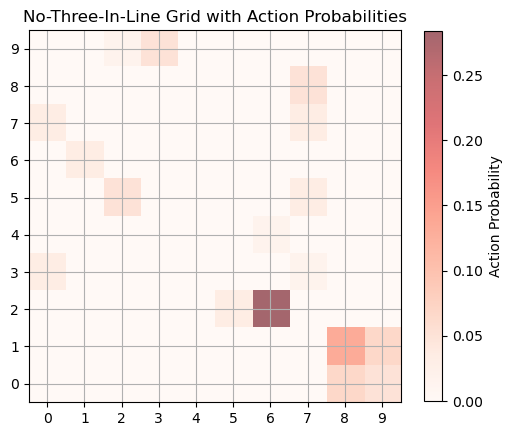

---------------------------
Number of points: 1
[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]


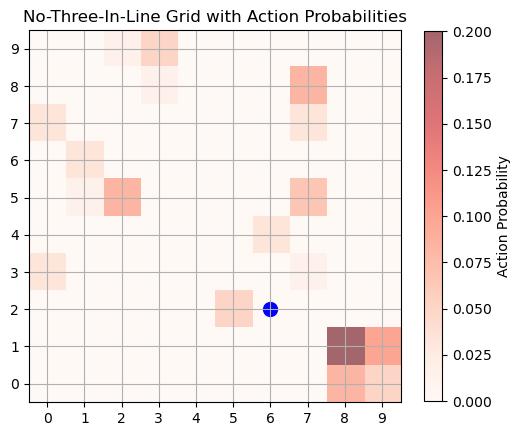

---------------------------
Number of points: 2
[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]


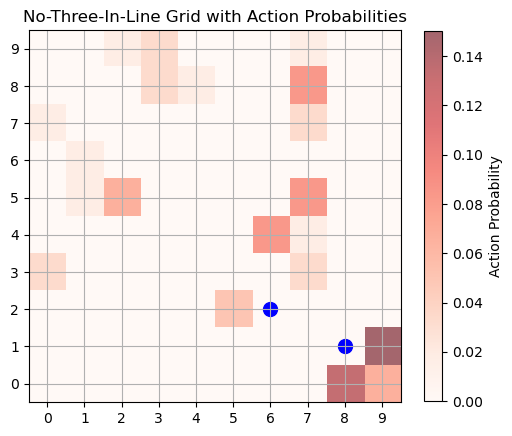

---------------------------
Number of points: 3
[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 1.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]


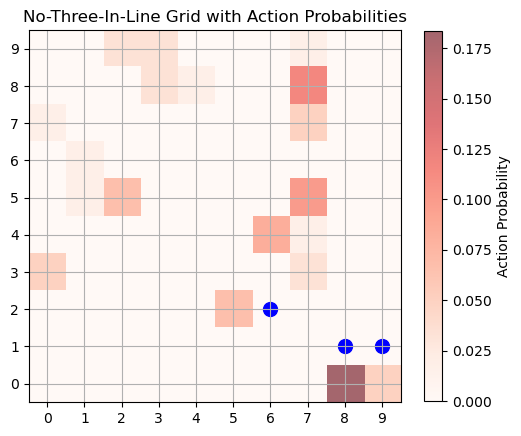

---------------------------
Number of points: 4
[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 1.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]]


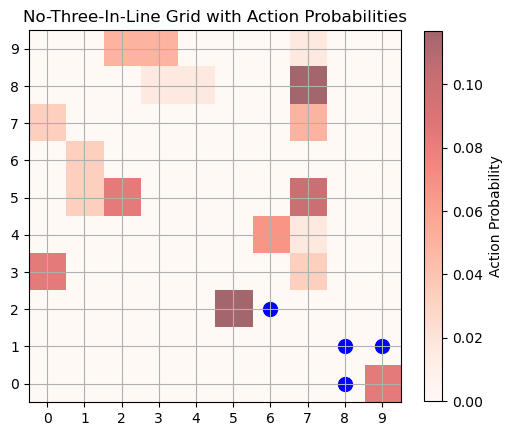

---------------------------
Number of points: 5
[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 1.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]]


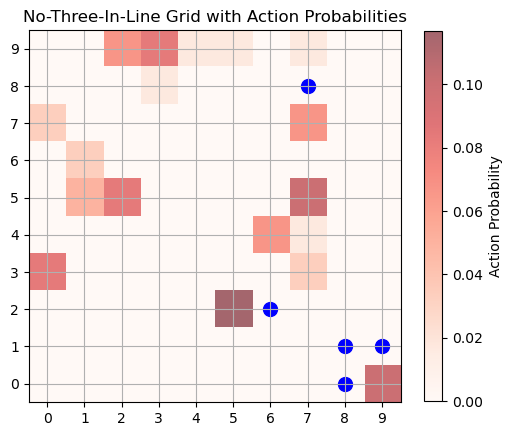

---------------------------
Number of points: 6
[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 1.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]]


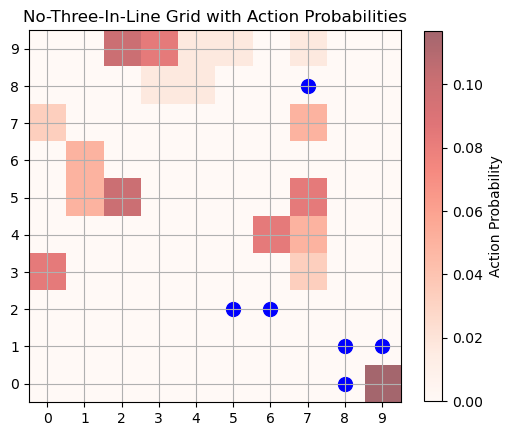

---------------------------
Number of points: 7
[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 1.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 1.]]


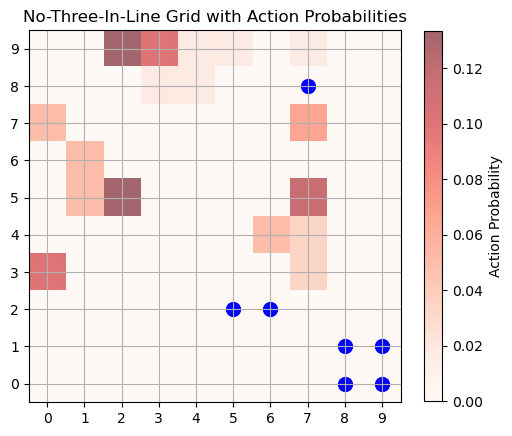

---------------------------
Number of points: 8
[[0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 1.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 1.]]


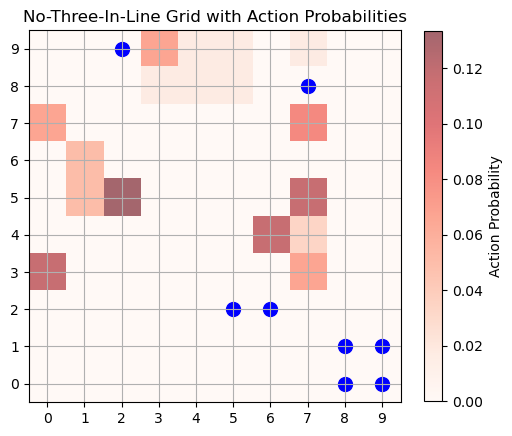

---------------------------
Number of points: 9
[[0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 1.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 1.]]


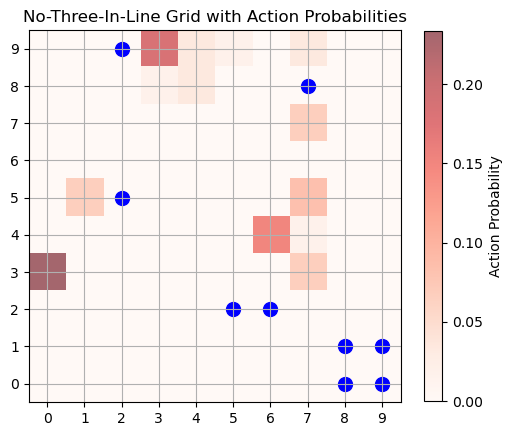

---------------------------
Number of points: 10
[[0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 1.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 1.]]


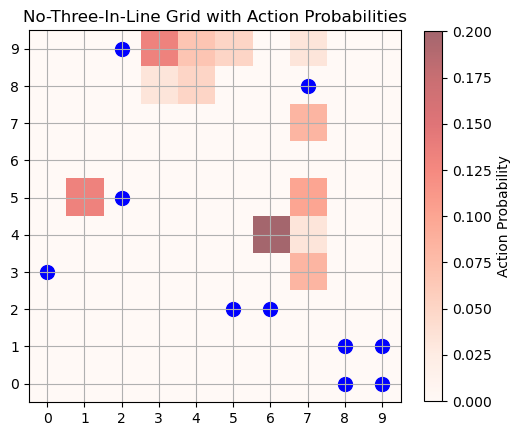

---------------------------
Number of points: 11
[[0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 1.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 1.]]


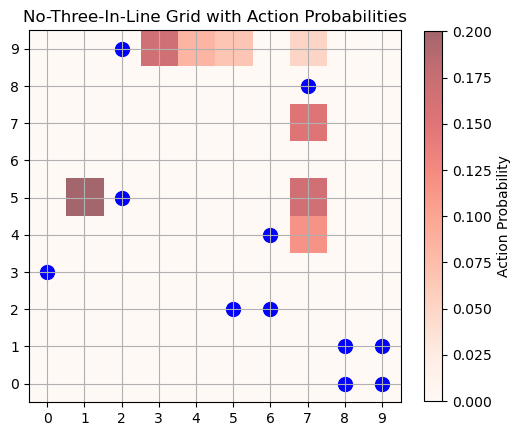

---------------------------
Number of points: 12
[[0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 1.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 1.]]


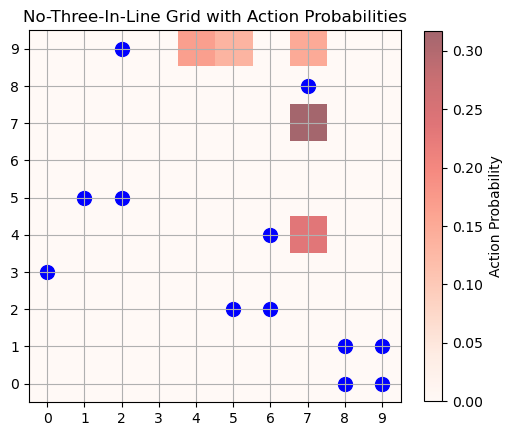

---------------------------
Number of points: 13
[[0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 1.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 1.]]


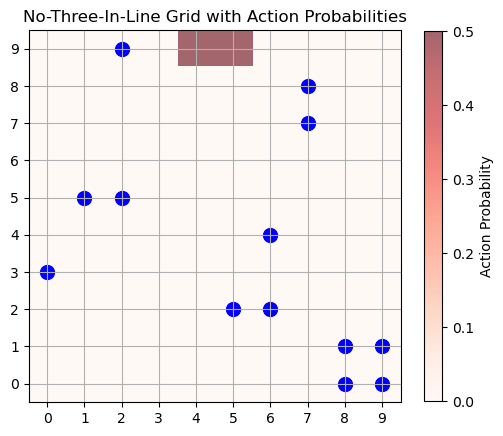

---------------------------
Number of points: 14
[[0. 0. 1. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 1.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 1.]]


/var/folders/ts/3flnl5q17n9040phm1x109tc0000gn/T/ipykernel_33805/1345721667.py:107: RuntimeWarning: invalid value encountered in divide
  action_probs /= np.sum(action_probs)


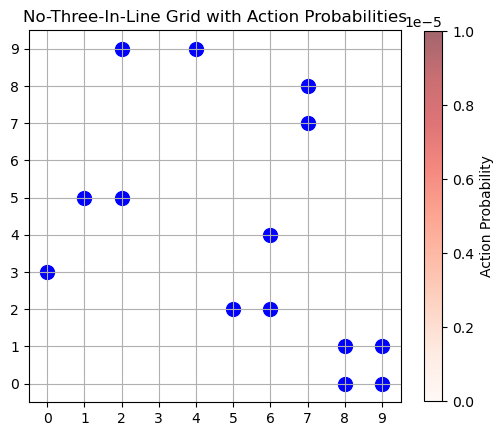

*******************************************************************
Trial Terminated with 14 points. Final valid configuration:
[[0. 0. 1. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 1.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 1.]]


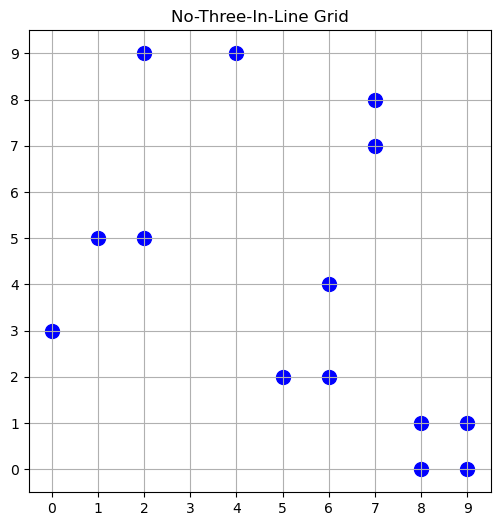

The point you give causes 2 triples of 3 points collinear:
[[1. 0. 1. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 1.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 1.]]


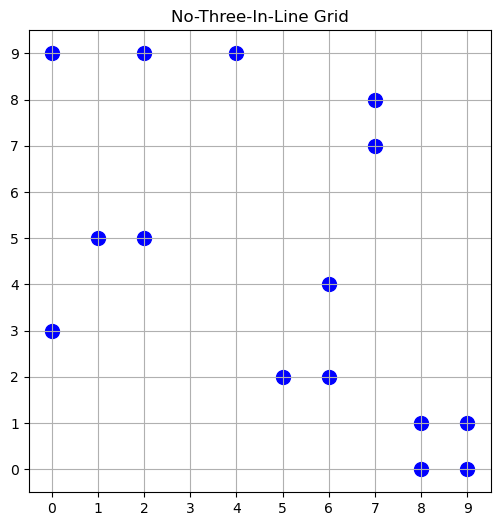